In [96]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

path = '/net/vdesk/data2/bach1/ballieux/master_project_2/plots/'

In [97]:
#Todo: so far have payed no attention to significant digits
#TODO: this is just with the M0 map outside range - Vsys


outflow_ID_lowmass=np.array(['Oph_12_blue', 'Oph_12_red', 'Oph_26_blue', 'Oph_26_red', 'Oph_27_blue', 'Oph_27_red',  'Oph_29_red', 'Oph_31_red',\
                     'Oph_34_blue', 'Oph_34_red', 'Oph_39_blue', 'Oph_39_red'])

radius_lowmass = np.array([893.8, 969.5, 727.3, 604.8, 539.3, 263.1, 847.6, 757.7, 816.7, 281.7, 985.7, 406.3]) *u.AU
e_radius_lowmass = np.array([191.1, 194.8, 184.1, 179.6, 177.5, 171.1 , 189.4, 185.7, 188.7, 172.4, 198.6, 177.2 ]) *u.AU

deltaV_lowmass = np.array([7.0, 7.1, 10.6, 8.7, 15.2, 9.5, 3.1, 6.3, 11.9, 2.4, 7.8, 7.9 ]) *u.km / u.s
e_deltaV_lowmass = np.square(np.sqrt(0.05 * deltaV_lowmass) + np.sqrt(0.08 *u.km / u.s)) 

t_dyn_lowmass = (radius_lowmass / deltaV_lowmass).to(u.yr)
e_t_dyn_lowmass = np.sqrt(np.square(e_radius_lowmass/deltaV_lowmass)+np.square(radius_lowmass * e_deltaV_lowmass/ deltaV_lowmass **2)).to(u.yr)


outflow_ID_highmass = np.array(['G008.67_blue_A', 'G008.67_red_A', 'G008.67_blue_B', 'G008.67_red_B', 'G328.25_blue', 'G328.25_red', 'G337.92_blue', \
                       'G337.92_red', 'G338.93_red_A', 'G338.93_red_B','G338.93_red_C', 'G351.77_red_A', 'G351.77_red_B'])

radius_highmass = np.array([5.049e+04, 3.297e+04, 5.049e+04, 1.93e+04, 3.511e+04, 2.653e+04, 4.765e+04, 4.207e+04, 3.627e+04,\
                             5.765e+04, 4.68e+03, 1.475e+04, 2.739e+04])*u.AU
e_radius_highmass = np.array([5.796e+03, 4.355e+03, 5.796e+03, 4.355e+03, 3.914e+03, 3.166e+03, 5.172e+03, 4.664e+03, 4.554e+03,\
                               6.389e+03, 2.793e+03, 2.508e+03, 3.408e+03])*u.AU

deltaV_highmass = np.array([64.0, 38.9, 53.8, 36.4, 74.1, 69.4, 86.6, 83.6, 50.6, 90.0, 35.4,  1.29e+02, 1.05e+02])*u.km / u.s
e_deltaV_highmass = np.square(np.sqrt(0.05 * deltaV_highmass) + np.sqrt(1.3*u.km / u.s))

t_dyn_highmass = (radius_highmass / deltaV_highmass).to(u.yr)
e_t_dyn_highmass = np.sqrt(np.square(e_radius_highmass/deltaV_highmass)+np.square(radius_highmass * e_deltaV_highmass/ deltaV_highmass **2)).to(u.yr)

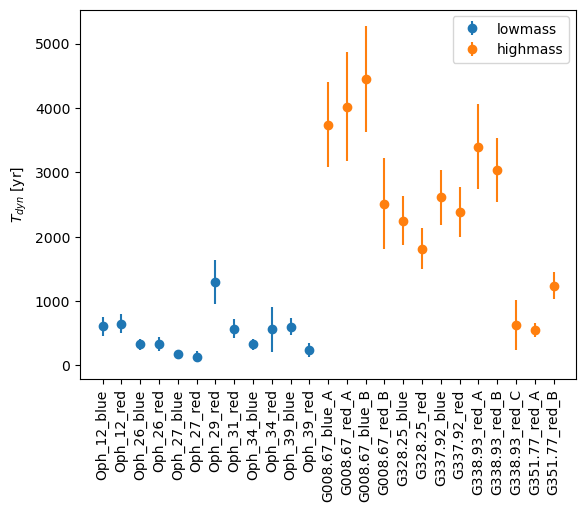

In [98]:
plt.errorbar(outflow_ID_lowmass,t_dyn_lowmass, yerr=e_t_dyn_lowmass, fmt='o', label='lowmass')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass, yerr=e_t_dyn_highmass, fmt='o', label='highmass')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel(r'$T_{dyn}$ [yr]')
plt.show()

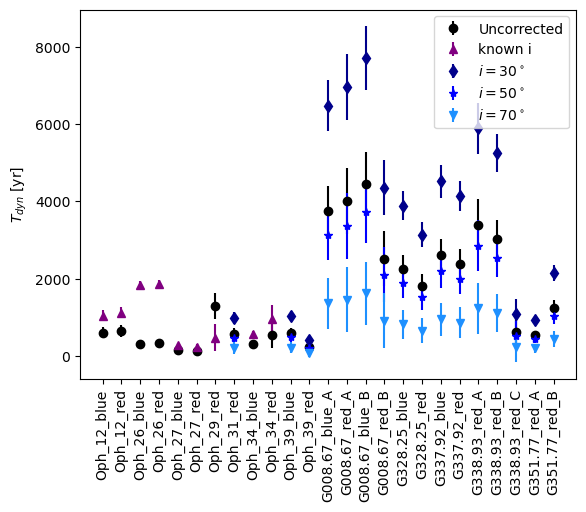

In [99]:
"""  
We account for the inclination: multiply with tan(i) where it is known, with tan(i) where it is unknown, take i=30,50,70


Actually, do same calculation
Vdmarel: i=90 for plane of sky, i=0 for pole-on
Then Robs = True sin(i)
Vobs = Vtrue cos(i)
Tobs = Ttrue * tan(i)
Ttrue = Tobs/tan(i)
"""
#uncorrected
plt.errorbar(outflow_ID_lowmass,t_dyn_lowmass, yerr=e_t_dyn_lowmass, fmt='o', label='Uncorrected', color='black')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass, yerr=e_t_dyn_highmass, fmt='o', color='black')

mask_i_known_lowmass = np.array([1,1,1,1,1,1,1,0,1,1,0,0], dtype=bool)
mask_i_unknown_lowmass = ~mask_i_known_lowmass

#i=30, and the ones with known i
i=30
inclinations_low = np.array([30,30,10,10,30,30,70,i,30,30,i,i])* u.deg
inclinations_high=np.ones(len(outflow_ID_highmass)) * i * u.deg
plt.errorbar(outflow_ID_lowmass[mask_i_known_lowmass],t_dyn_lowmass[mask_i_known_lowmass ] /\
              np.tan(inclinations_low)[mask_i_known_lowmass ], yerr=e_t_dyn_lowmass[mask_i_known_lowmass], fmt='^', label='known i', color='purple')
plt.errorbar(outflow_ID_lowmass[mask_i_unknown_lowmass],t_dyn_lowmass[mask_i_unknown_lowmass] /\
             np.tan(inclinations_low)[mask_i_unknown_lowmass ], yerr=e_t_dyn_lowmass[mask_i_unknown_lowmass], fmt='d', label=r'$i = 30^\circ$', color='darkblue')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass / np.tan(inclinations_high), yerr=e_t_dyn_highmass, fmt='d', color='darkblue')

i=50 
inclinations_low = np.array([30,30,10,10,30,30,70,i,30,30,i,i])* u.deg
inclinations_high=np.ones(len(outflow_ID_highmass)) * i * u.deg
plt.errorbar(outflow_ID_lowmass[mask_i_unknown_lowmass],t_dyn_lowmass[mask_i_unknown_lowmass] /\
             np.tan(inclinations_low)[mask_i_unknown_lowmass ], yerr=e_t_dyn_lowmass[mask_i_unknown_lowmass], fmt='*', label=r'$i = 50^\circ$', color='blue')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass / np.tan(inclinations_high), yerr=e_t_dyn_highmass, fmt='*', color='blue')

i=70
inclinations_low = np.array([30,30,10,10,30,30,70,i,30,30,i,i])* u.deg
inclinations_high = np.ones(len(outflow_ID_highmass)) * i * u.deg
plt.errorbar(outflow_ID_lowmass[mask_i_unknown_lowmass],t_dyn_lowmass[mask_i_unknown_lowmass] /\
             np.tan(inclinations_low)[mask_i_unknown_lowmass ], yerr=e_t_dyn_lowmass[mask_i_unknown_lowmass], fmt='v', label=r'$i = 70^\circ$', color='dodgerblue')
plt.errorbar(outflow_ID_highmass,t_dyn_highmass / np.tan(inclinations_high), yerr=e_t_dyn_highmass, fmt='v', color='dodgerblue')

plt.legend()
plt.xticks(rotation=90)
plt.ylabel(r'$T_{dyn}$ [yr]')
plt.savefig(path+'dynamicage_comparison.png', dpi=500, bbox_inches='tight')
plt.show()

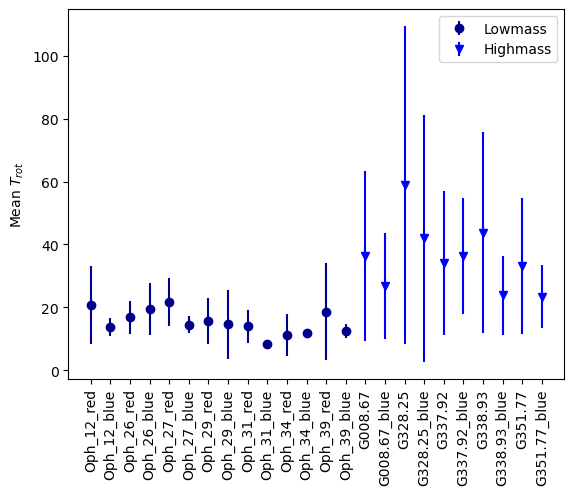

In [100]:
"""  
-mean over red and blue fields of rotational temperatures
-No pixels were removed because not significant enough
-Mean of uncertainties taken
-
"""
lowmass_ID_fields = np.array(['Oph_12_red', 'Oph_12_blue', 'Oph_26_red','Oph_26_blue', 'Oph_27_red', 'Oph_27_blue','Oph_29_red', 'Oph_29_blue', 'Oph_31_red',\
                              'Oph_31_blue', 'Oph_34_red', 'Oph_34_blue', 'Oph_39_red','Oph_39_blue'])
highmass_ID_fields = np.array(['G008.67', 'G008.67_blue','G328.25', 'G328.25_blue', 'G337.92', 'G337.92_blue', 'G338.93', 'G338.93_blue','G351.77', 'G351.77_blue'])

highmass_T_behaved = np.array([36.3465, 26.7294, 58.8943, 41.9846, 34.1064, 36.3958, 43.7935, 23.8564, 33.0765,\
                            23.4639]) * u.K
e_T_highmass=np.array([26.8761, 16.8400, 50.5505, 39.3191, 23.01636, 18.4352, 32.02570, 12.5961,\
                            21.5578, 10.0463]) * u.K
lowmass_T_behaved = np.array([ 20.8736, 13.8169, 16.8479, 19.5586, 21.7604, 14.5008,\
                            15.6537, 14.6140, 13.9441, 8.2993, 11.2785, 11.84798, 18.6831, 12.5007]) * u.K
e_T_lowmass = np.array([12.3363, 2.9270, 5.1822, 8.2073, 7.5858, 2.6978, 7.2105, 11.0195, 5.1955, 1.1003, 6.7922, 0.9774, 15.5429, 2.1975])* u.K

plt.errorbar(lowmass_ID_fields, lowmass_T_behaved, yerr=e_T_lowmass, fmt='o', label='Lowmass', color='darkblue')
plt.errorbar(highmass_ID_fields, highmass_T_behaved, yerr=e_T_highmass, label='Highmass', color='blue', fmt='v')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel(r'Mean $T_{rot}$' )
plt.savefig(path+'Temperature_comparison.png', dpi=500, bbox_inches='tight')
plt.show()


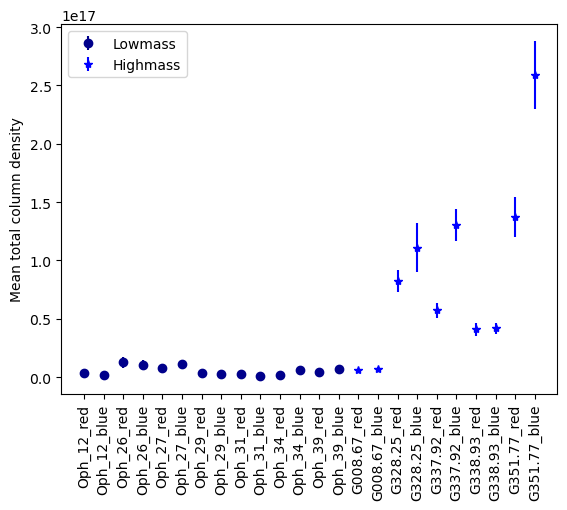

In [101]:
"""  
-mean over red and blue fields of column densities
-No pixels were removed because not significant enough
-Mean of uncertainties taken
-
"""
lowmass_ID_fields = np.array(['Oph_12_red', 'Oph_12_blue', 'Oph_26_red','Oph_26_blue', 'Oph_27_red', 'Oph_27_blue','Oph_29_red', 'Oph_29_blue', 'Oph_31_red',\
                              'Oph_31_blue', 'Oph_34_red', 'Oph_34_blue', 'Oph_39_red','Oph_39_blue'])
highmass_ID_fields = np.array(['G008.67_red', 'G008.67_blue','G328.25_red', 'G328.25_blue', 'G337.92_red', 'G337.92_blue', 'G338.93_red', 'G338.93_blue','G351.77_red'\
                               , 'G351.77_blue'])


lowmass_N_behaved = np.array([3.453e+15, 2.025e+15, 1.257e+16, 1.028e+16, 7.593e+15, 1.088e+16, 3.58e+15, 2.924e+15, 3.036e+15, 8.222e+14, 1.653e+15, 6.088e+15, 4.646e+15,\
                              6.694e+15]) / u.cm**2
e_N_lowmass = np.array([2.199e+15, 5.589e+14, 4.998e+15, 4.339e+15, 2.303e+15, 2.654e+15, 1.376e+15, 1.382e+15, 1.539e+15, 3.082e+14, 1.597e+15, 8.416e+14, 2.968e+15,\
                        1.662e+15])/ u.cm**2

highmass_N_behaved = np.array([6.324e+15,6.924e+15, 8.223e+16, 1.11e+17, 5.735e+16, 1.303e+17, 4.101e+16, 4.17e+16, 1.373e+17, 2.591e+17]) / u.cm**2
e_N_highmass=np.array([7.374e+14, 1.36e+15, 9.219e+15, 2.094e+16, 6.518e+15, 1.37e+16, 5.638e+15, 4.485e+15, 1.707e+16, 2.903e+16]) / u.cm**2



plt.errorbar(lowmass_ID_fields, lowmass_N_behaved, yerr=e_N_lowmass, fmt='o', label='Lowmass', color='darkblue')
plt.errorbar(highmass_ID_fields, highmass_N_behaved, yerr=e_N_highmass, label='Highmass', color='blue', fmt='*')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Mean total column density')
# plt.semilogy()
plt.savefig(path+'columndensity_comparison.png', dpi=500, bbox_inches='tight')
plt.show()